# Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

Student name and ID: Kiran Venkatesh Kulkarni, 1001848434
Student name and ID: Vijetha Shenoy Badiadka, 1001822855

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
from sklearn.tree import plot_tree

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

In [2]:
df=pd.read_csv('gender_Classifier.csv',encoding='latin1')
df.head(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0000,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/2015 1:57,brand,1.0000,yes,1.0,4/24/2008 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)


In [3]:
df.tail(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/2011 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/2015 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/2014 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/2015 13:19,6.590000e+17,NaN,NaN


In [4]:
print('Class labels before cleaning the data are: ', df.gender.unique().tolist())

Class labels before cleaning the data are:  ['male', 'female', 'brand', 'unknown', 'Other']


In [5]:
# le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
for col in df:
    df[col] = label_encoder.fit_transform(df[col])

In [6]:
X = df.drop(['gender'], axis = 1)
Y = df.gender

In [7]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,0,0,0,0,101,3,922,1,266,4986,...,2179,0,560,13472,146,13177,1,0,7045,48
1,1,0,0,0,107,3,922,1,266,1347,...,4099,0,366,18364,146,4362,1,0,7864,55
2,2,0,0,0,110,3,561,1,266,3705,...,14587,1,366,17412,146,3599,1,0,6613,28
3,3,0,0,0,87,3,922,1,266,11907,...,913,0,366,9180,146,1465,1,0,4426,118
4,4,0,0,0,212,2,922,1,266,8932,...,4705,0,0,16005,146,8878,1,0,7864,156


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4) 

In [9]:
gini = DecisionTreeClassifier(criterion='entropy', splitter = 'random', min_samples_leaf = 5, max_depth = 6)

# Train Decision Tree Classifer
clf_gini = gini.fit(X_train, y_train)

# Predict the response for test dataset
Y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = metrics.accuracy_score(y_test, Y_pred_gini)
# Quantifying the Quality of the split using Classification Report
print("Using Gini Index to measure the quality of the split\n")
print("Accuracy:", accuracy_gini)

Using Gini Index to measure the quality of the split

Accuracy: 0.486284289276808


In [10]:
#Print the Accuracy of the split
print("Classification Report\n", metrics.classification_report(y_test, Y_pred_gini))

# USING ENTROPY TO MEASURE THE QUALITY OF SPLIT
# Create Decision Tree classifer object
entropy = DecisionTreeClassifier(criterion='entropy', random_state = 100, min_samples_leaf = 5, max_depth = 5)

# Train Decision Tree Classifer
clf_entropy = entropy.fit(X_train, y_train)

# Predict the response for test dataset
Y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = metrics.accuracy_score(y_test, Y_pred_entropy)
# Print the Accuracy of the split
print("Using Entropy to measure the quality of the split\n")
print("Accuracy:", accuracy_entropy)

# Quantifying the Quality of the split using Classification Report
print("Classification Report\n", metrics.classification_report(y_test, Y_pred_entropy))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.48      0.74      0.59      2389
           2       0.53      0.57      0.55      2643
           3       0.41      0.21      0.28      2504
           4       0.32      0.13      0.18       447

    accuracy                           0.49      8020
   macro avg       0.55      0.53      0.52      8020
weighted avg       0.47      0.49      0.46      8020

Using Entropy to measure the quality of the split

Accuracy: 0.5145885286783043
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.57      0.66      0.61      2389
           2       0.58      0.51      0.55      2643
           3       0.41      0.46      0.43      2504
           4       0.32      0.06      0.10       447

    accuracy                           0.51      8020
   ma

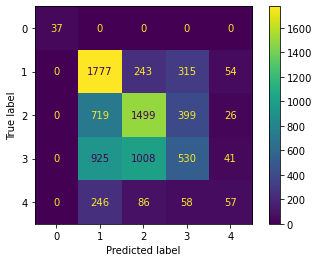

In [11]:
con_matrix = confusion_matrix(y_test, Y_pred_gini, labels=clf_gini.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=clf_gini.classes_)
disp.plot() 

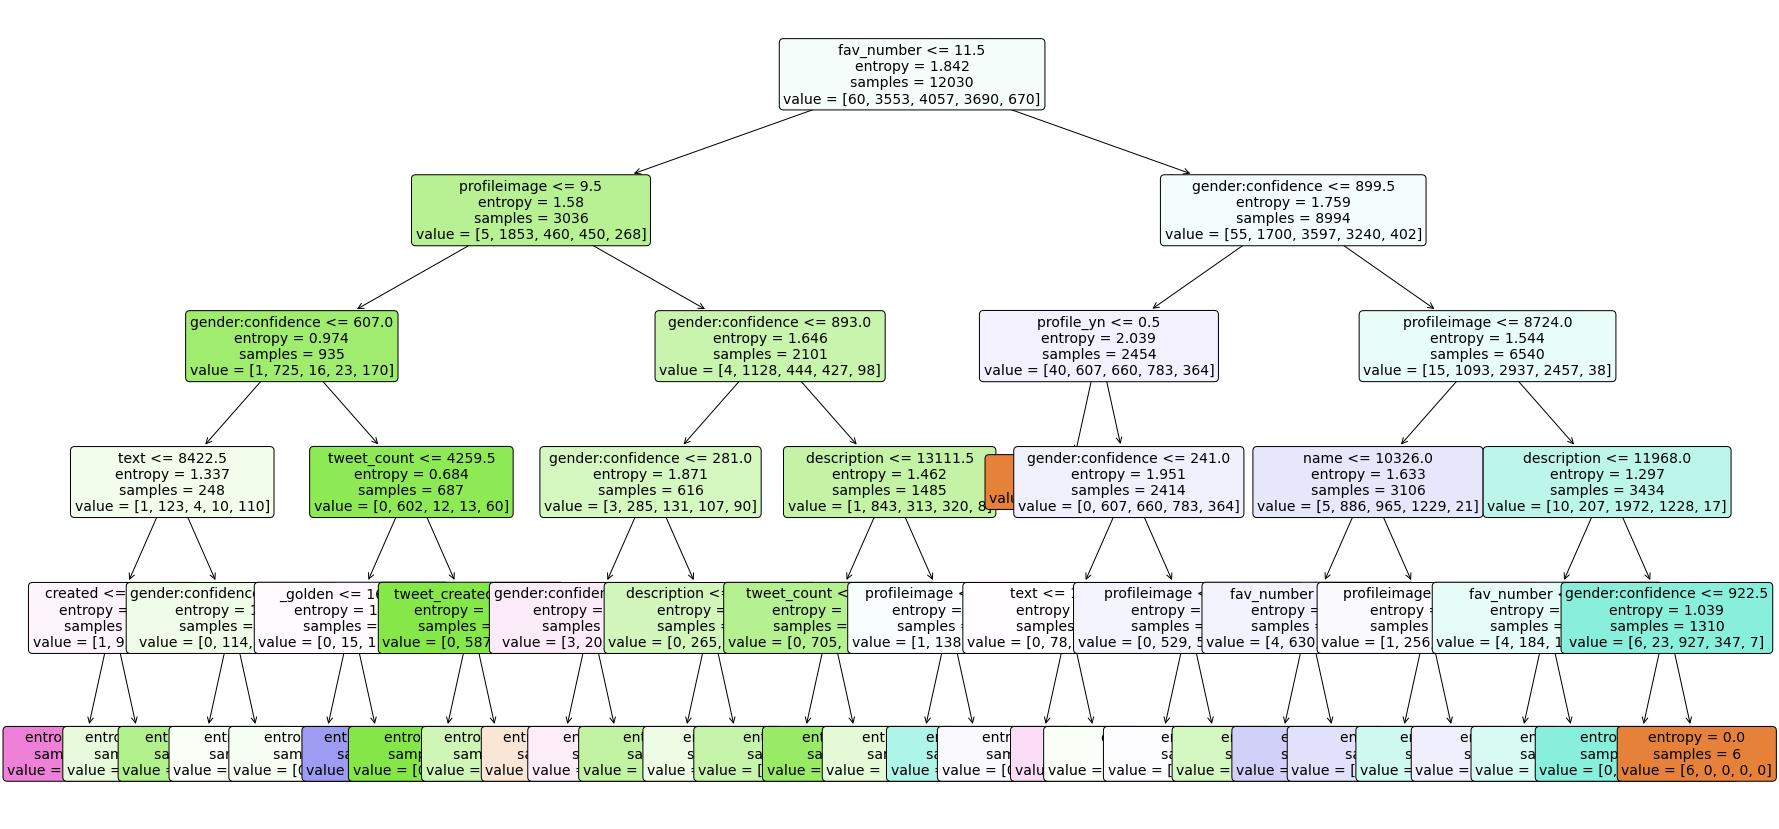

In [12]:
#4) Print the decision tree visualization. [10 points]

# Using Figure class instance from matplotlib to define axes
plt.figure(figsize=(30,15))

# Plot a Entropy Decision Tree using plot_tree from sklearn
decision_tree = plot_tree(clf_entropy, 
              feature_names= list(df.columns[1:25]),
              filled=True, 
              rounded=True, 
              fontsize=14)

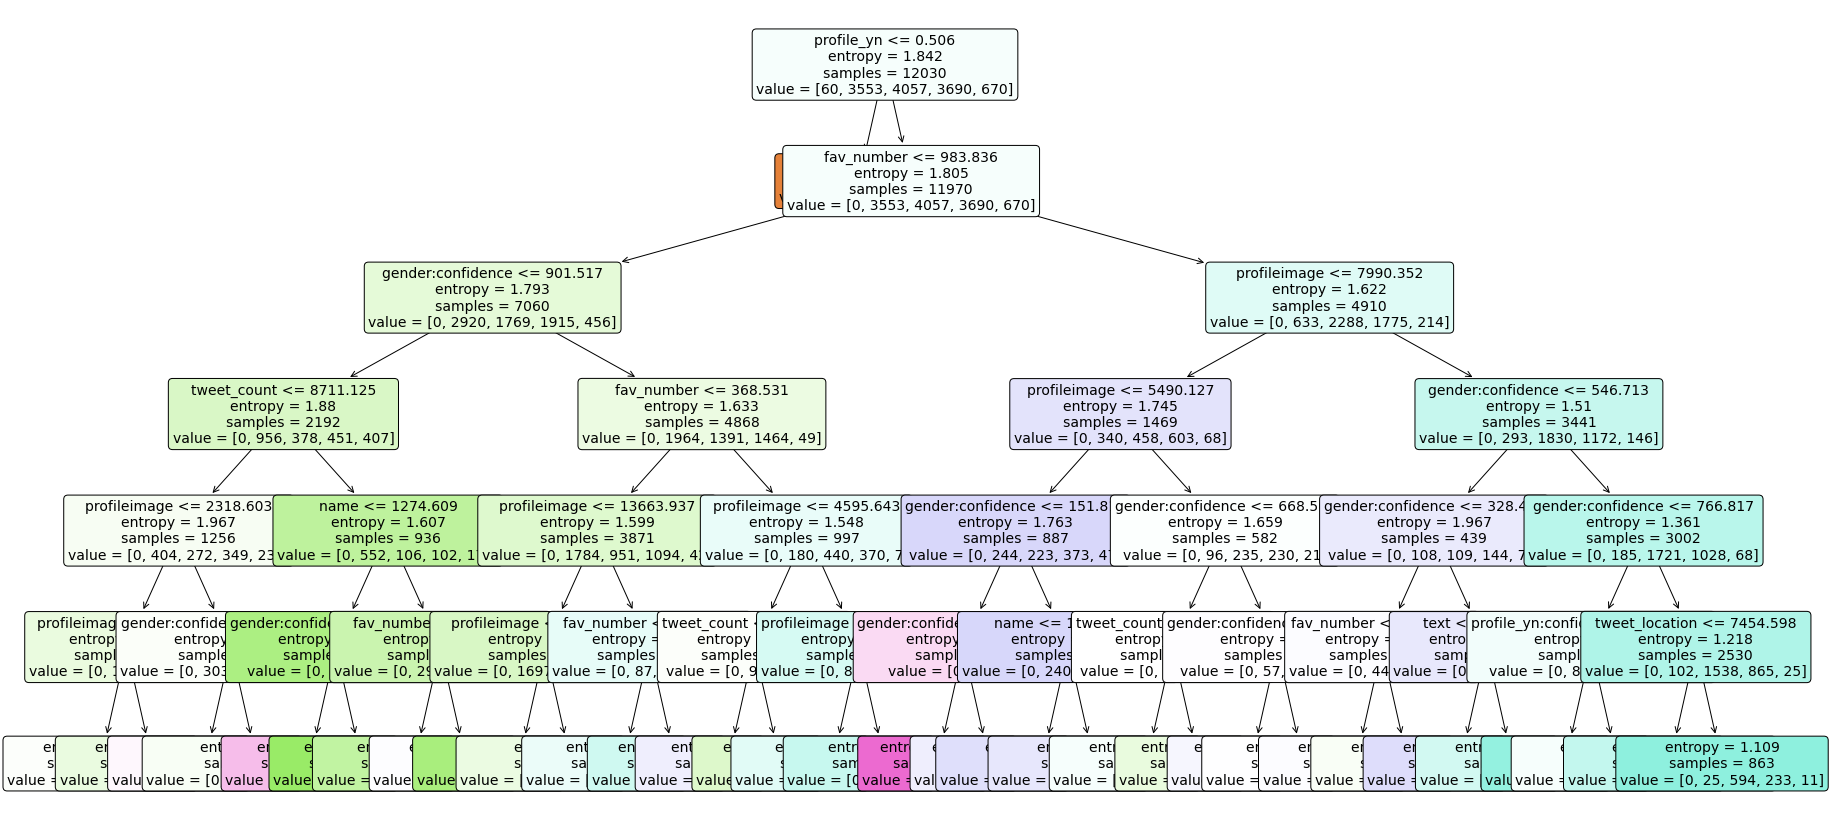

In [13]:
# Using Figure class instance from matplotlib to define axes
plt.figure(figsize=(30,15))
# Plot a Gini Decision Tree using plot_tree from sklearn
decision_tree1 = plot_tree(clf_gini, 
              feature_names= list(df.columns[1:25]),
              filled=True, 
              rounded=True, 
              fontsize=14)

### DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

In [14]:
gini = DecisionTreeClassifier(criterion='gini', random_state = 100, min_samples_leaf = 5, max_depth = 5)

# Train Decision Tree Classifer
clf_gini = gini.fit(X_train, y_train)

# Predict the response for test dataset
Y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = metrics.accuracy_score(y_test, Y_pred_entropy)
# Print the Accuracy of the split
print("Using gini to measure the quality of the split\n")
print("Accuracy:", accuracy_gini)

# Quantifying the Quality of the split using Classification Report
print("Classification Report\n", metrics.classification_report(y_test, Y_pred_entropy))

Using gini to measure the quality of the split

Accuracy: 0.5145885286783043
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.57      0.66      0.61      2389
           2       0.58      0.51      0.55      2643
           3       0.41      0.46      0.43      2504
           4       0.32      0.06      0.10       447

    accuracy                           0.51      8020
   macro avg       0.56      0.49      0.50      8020
weighted avg       0.51      0.51      0.51      8020



# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

In [15]:
# Create Gaussian Naive Bayes classifer object
gaussian = GaussianNB()

# Train Gaussian Naive Bayes Tree Classifer
clf_gaussian = gaussian.fit(X_train, y_train)

# Predict the response for test dataset
Y_pred = clf_gaussian.predict(X_test)

# Print the Accuracy of the split
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.1172069825436409


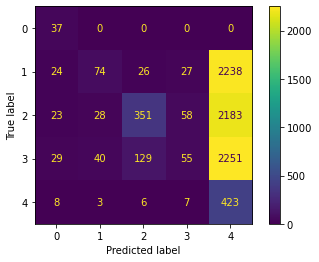

In [16]:
# evaluate the accuracy of a classification using confusion matrix and displaying the matrix
con_matrix = confusion_matrix(y_test, Y_pred, labels=clf_gaussian.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=clf_gaussian.classes_)
display.plot() 

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!